In [1]:
#DATA CLEANING


import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Pkhur\Downloads\ipl_players-raw-data.csv")
df.head()
df.info()
df.isna().sum()
df["Team"].value_counts()
df["Season"].unique()
df = df[df["Season"].between(2018, 2024)].copy()
invalid_teams = ["RPS", "GL"]
df = df[~df["Team"].isin(invalid_teams)]
df["Team"] = df["Team"].replace({
    "KXIP": "PBKS"
})
df.replace("-", np.nan, inplace=True)
numeric_cols = [
    "Matches", "Runs", "Average",
    "StrikeRate", "Wickets", "Economy"
]
df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)
df["Wickets"] = df["Wickets"].fillna(0)                # Players who do not bowl
df.loc[df["Wickets"] == 0, "Economy"] = np.nan
df = df.drop_duplicates()
df["PerformanceScore"] = (
    df["Runs"].fillna(0) * 0.6 +
    df["StrikeRate"].fillna(0) * 0.3 +
    df["Wickets"] * 25
)
sorted(df["Team"].unique())
['CSK','DC','GT','KKR','LSG','MI','PBKS','RCB','RR','SRH']
df["Season"].min(), df["Season"].max()
df.to_csv(
    r"C:\Users\Pkhur\Downloads\ipl_players_clean_data.csv",
    index=False
)
print("Task 2 completed: Clean dataset saved")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      403 non-null    object
 1   Team        403 non-null    object
 2   Season      403 non-null    int64 
 3   Matches     403 non-null    int64 
 4   Runs        400 non-null    object
 5   Average     391 non-null    object
 6   StrikeRate  391 non-null    object
 7   Wickets     402 non-null    object
 8   Economy     354 non-null    object
dtypes: int64(2), object(7)
memory usage: 28.5+ KB
Task 2 completed: Clean dataset saved


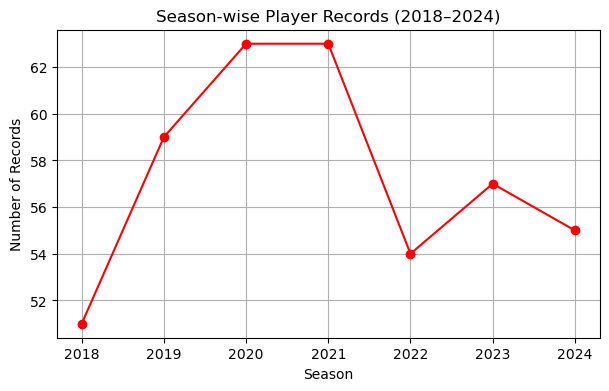

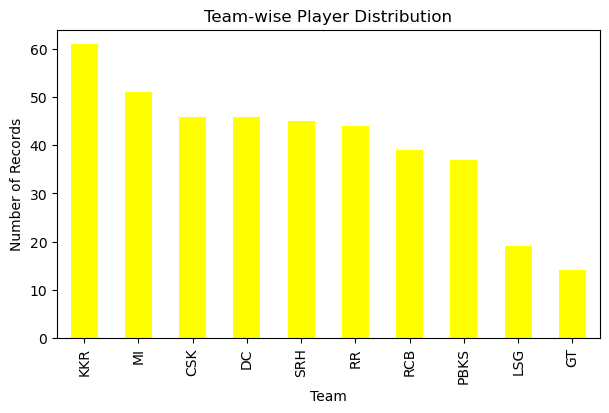

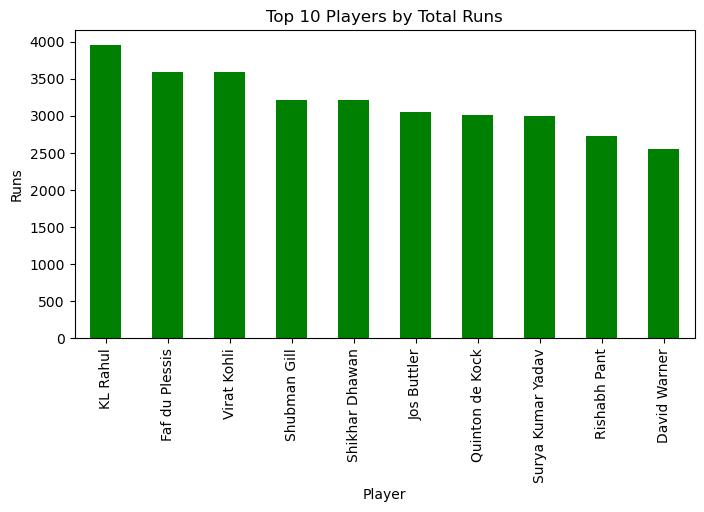

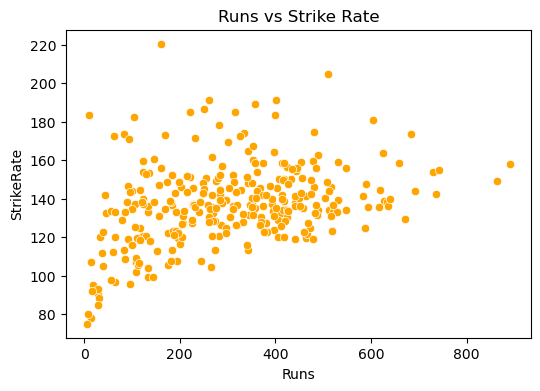

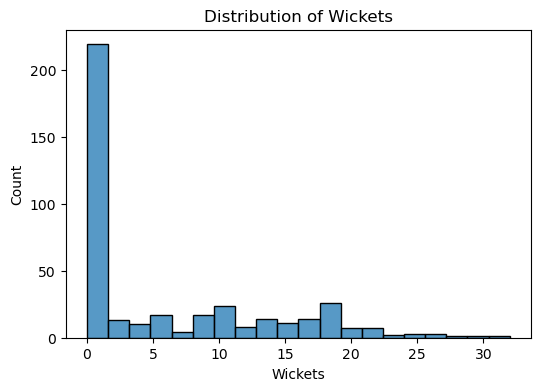

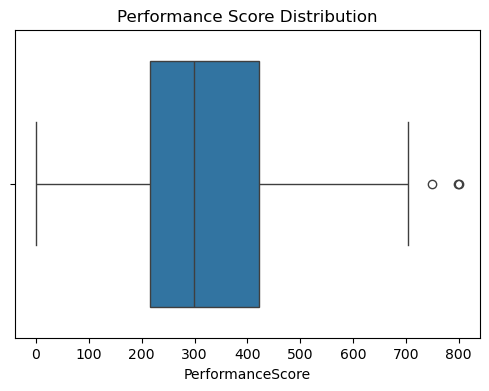

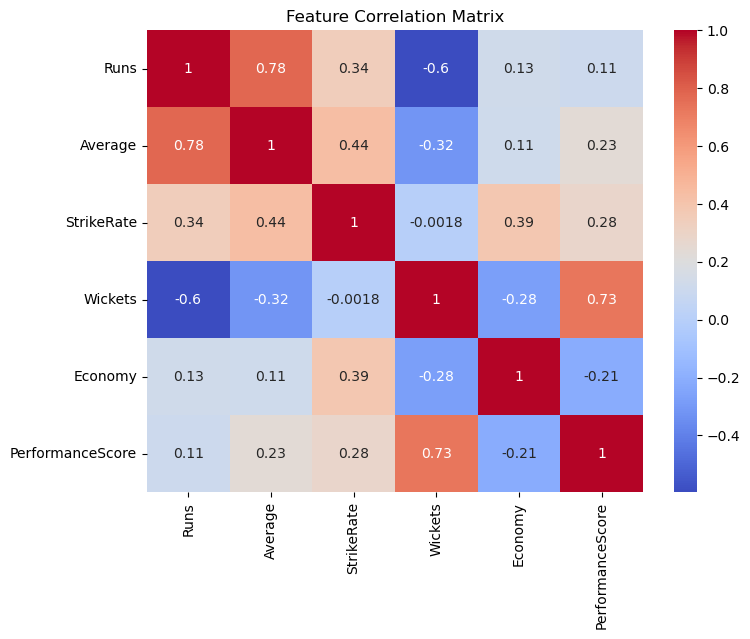

In [1]:
#DATA ANALYSIS



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Pkhur\Downloads\ipl_players_clean_data.csv")
df.head()
df.shape
df.describe()
plt.figure(figsize=(7,4))
df.groupby("Season")["Player"].count().plot(marker="o", color='red')
plt.title("Season-wise Player Records (2018–2024)")
plt.xlabel("Season")
plt.ylabel("Number of Records")
plt.grid(True)
plt.show()
plt.figure(figsize=(7,4))
df["Team"].value_counts().plot(kind="bar", color='yellow')
plt.title("Team-wise Player Distribution")
plt.xlabel("Team")
plt.ylabel("Number of Records")
plt.show()
top_runs = df.groupby("Player")["Runs"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_runs.plot(kind="bar", color='green')
plt.title("Top 10 Players by Total Runs")
plt.xlabel("Player")
plt.ylabel("Runs")
plt.show()
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Runs", y="StrikeRate", color='orange')
plt.title("Runs vs Strike Rate")
plt.show()
plt.figure(figsize=(6,4))
sns.histplot(df["Wickets"], bins=20, color='violet')
plt.title("Distribution of Wickets")
plt.xlabel("Wickets")
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df["PerformanceScore"], color='silver')
plt.title("Performance Score Distribution")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["Runs","Average","StrikeRate","Wickets","Economy","PerformanceScore"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.show()


MAE: 5.070292608263431e-14
RMSE: 6.32973645932662e-14
R² Score: 1.0


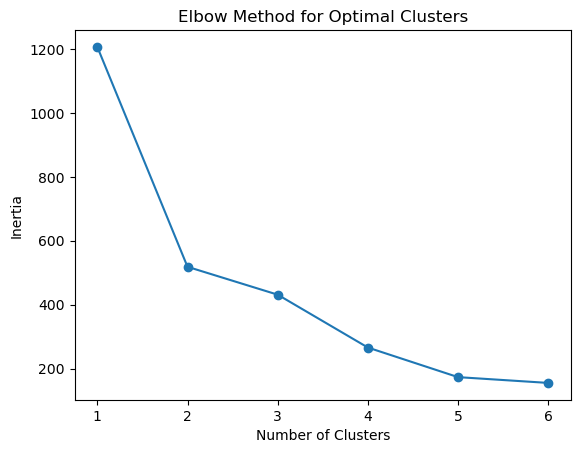

Accuracy: 1.0
[[39  0]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        42

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Task 3 completed: ML outputs saved


In [ ]:
#ML Model




import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Pkhur\Downloads\ipl_players_clean_data.csv")
df.head()
X = df[["Runs", "StrikeRate", "Wickets"]].fillna(0)
y = df["PerformanceScore"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": reg.coef_
}).sort_values(by="Coefficient", ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_features = df[["Runs", "StrikeRate", "Wickets"]].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)
inertia = []
for k in range(1, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 7), inertia, marker="o",)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)
cluster_map = {
    0: "Average Performers",
    1: "Elite Performers",
    2: "Low Impact Players"
}
df["ClusterLabel"] = df["Cluster"].map(cluster_map)
df.groupby("ClusterLabel")[["Runs","StrikeRate","Wickets","PerformanceScore"]].mean()
df["HighPerformer"] = (
    df["PerformanceScore"] >= df["PerformanceScore"].median()
).astype(int)
X = df[["Runs", "StrikeRate", "Wickets"]].fillna(0)
y = df["HighPerformer"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
df.to_csv(
    r"C:\Users\Pkhur\Downloads\ipl_players_clean_data.csv",
    index=False
)
print("Task 3 completed: ML outputs saved")



In [ ]:
VIDEO LINK : https://drive.google.com/file/d/12y9ayPVEPO_M7YaJ7f2P6_b_G631kO86/view?usp=sharing